# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import re
import shap
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from model.model_building import load_data

# Set up constants

In [3]:
METAL_MODEL_REDUCED_PATH = "../model/saved_models/new_models/metal_reduced.model"
INSULATOR_MODEL_REDUCED_PATH = "../model/saved_models/new_models/insulator_reduced.model"
MIT_MODEL_REDUCED_PATH = "../model/saved_models/new_models/mit_reduced.model"
REDUCED_PATH = "../data/processed/IMT_Classification_Dataset_Reduced_Feature_Set_v10.xlsx"
SAVE_PLOT = True

# Read in the data & model

In [4]:
# load the reduced feature set
df_reduced = pd.read_excel(REDUCED_PATH)
# load the metal vs. non_metal classifier
metal_model = xgb.XGBClassifier()
metal_model.load_model(METAL_MODEL_REDUCED_PATH)
# load the insulator vs. non_insulator classifier
insulator_model = xgb.XGBClassifier()
insulator_model.load_model(INSULATOR_MODEL_REDUCED_PATH)
# load the mit vs. non_mit classifier
mit_model = xgb.XGBClassifier()
mit_model.load_model(MIT_MODEL_REDUCED_PATH)

# See feature importance directly from XGBClassifier

Before we move on to the SHAP analysis on the reduced feature set models, let's first see the feature importance straight from the XGBoost models themselves.

In [5]:
def get_direct_feature_importance(input_model, **kwargs):
    """Plot feature importance directly from the XGBoost models"""
    importance_plot = xgb.plot_importance(input_model, **kwargs)
    reorder_index = [int(string) for ytick in importance_plot.get_yticklabels() for string in re.findall(r"\d+", ytick.get_text())]
    feature_names = df_reduced.drop(columns=["Compound", "Label", "struct_file_path"]).columns.to_list()
    reordered_names = [feature_names[index] for index in reorder_index]
    importance_plot.set_yticklabels(reordered_names)
    importance_plot.figure

## Metal

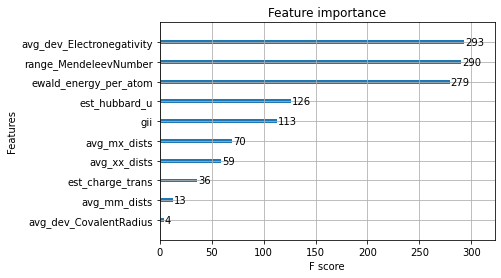

In [6]:
get_direct_feature_importance(metal_model)

## Insulator

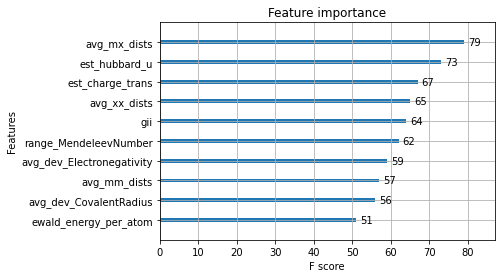

In [7]:
get_direct_feature_importance(insulator_model)

## MIT

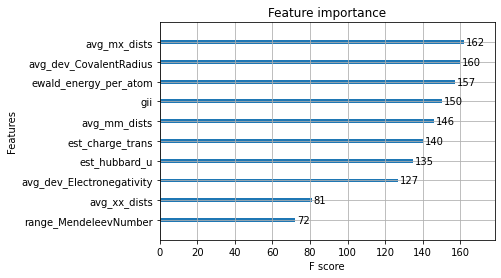

In [8]:
get_direct_feature_importance(mit_model)

# SHAP feature importance for Metal vs. non-Metal classifier trained on reduced feature set

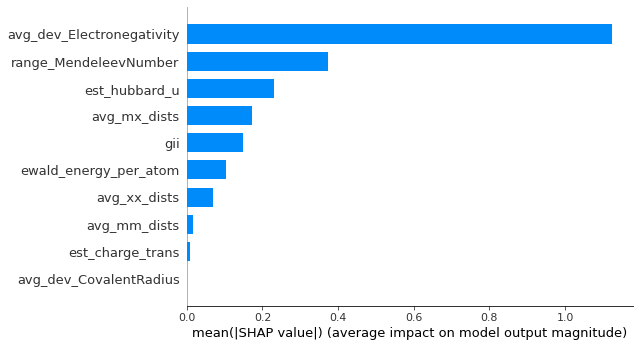

In [9]:
# load in the data
x, _ = load_data(df_reduced, "Metal")
# load the shap tree explainer
explainer = shap.TreeExplainer(metal_model)
# get the shap values
shap_values = explainer.shap_values(x)
# display the feature importance bar plot
shap.summary_plot(shap_values, x, plot_type="bar", max_display=10, show=False)
if SAVE_PLOT: plt.savefig("../plots/Metal_top_10_features_reduced.pdf", dpi=300, bbox_inches="tight")

# SHAP feature importance for Insulator vs. non-Insulator classifier trained on reduced feature set

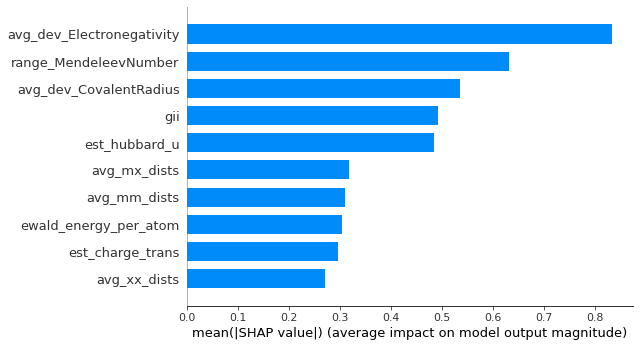

In [10]:
# load in the data
x, _ = load_data(df_reduced, "Insulator")
# load the shap tree explainer
explainer = shap.TreeExplainer(insulator_model)
# get the shap values
shap_values = explainer.shap_values(x)
# display the feature importance bar plot
shap.summary_plot(shap_values, x, plot_type="bar", max_display=10, show=False)
if SAVE_PLOT: plt.savefig("../plots/Insulator_top_10_features_reduced.pdf", dpi=300, bbox_inches="tight")

# SHAP feature importance for MIT vs. non-MIT classifier trained on reduced feature set

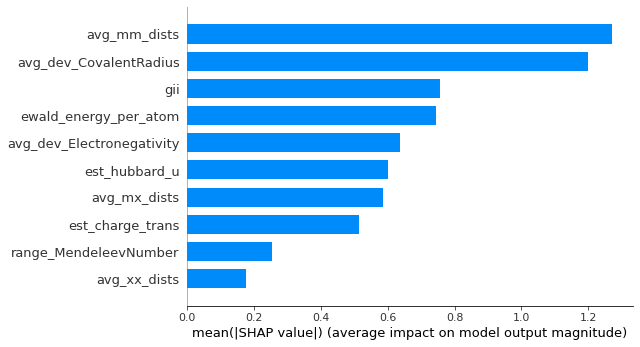

In [11]:
# load in the data
x, _ = load_data(df_reduced, "MIT")
# load the shap tree explainer
explainer = shap.TreeExplainer(mit_model)
# get the shap values
shap_values = explainer.shap_values(x)
# display the feature importance bar plot
shap.summary_plot(shap_values, x, plot_type="bar", max_display=10, show=False)
if SAVE_PLOT: plt.savefig("../plots/MIT_top_10_features_reduced.pdf", dpi=300, bbox_inches="tight")

In [12]:
x

,gii,est_hubbard_u,est_charge_trans,ewald_energy_per_atom,avg_dev_Electronegativity,range_MendeleevNumber,avg_dev_CovalentRadius,avg_mm_dists,avg_mx_dists,avg_xx_dists
0,0.000000,21.129322,19.461062,-12.916613,0.169412,76,8.608997,4.601000,2.596481,3.266718
1,1.080042,11.858755,35.445979,-29.022094,0.371200,74,31.840000,2.790950,2.259574,3.631725
2,3.015802,5.839285,34.042180,-27.929343,0.417600,74,29.120000,2.790243,2.355169,3.754372
3,1.337935,7.810114,33.195560,-28.030653,0.430400,74,28.960000,2.785294,2.346291,3.757078
4,1.037038,12.916563,10.425355,-12.725768,0.132595,76,8.276817,4.670000,2.635420,3.315708
...,...,...,...,...,...,...,...,...,...,...
338,0.128538,14.484546,9.779242,-47.781257,0.804444,41,38.666667,3.522330,1.927294,2.675472
339,0.188213,13.895560,12.815560,-34.679490,0.907200,75,44.160000,3.716576,1.933264,2.881036
340,0.188611,12.807177,16.608178,-37.225832,0.796800,75,35.160000,3.653850,2.356918,2.745188
341,0.231001,15.898371,10.393278,-34.202393,0.900000,75,43.680000,3.755161,1.963601,2.827539


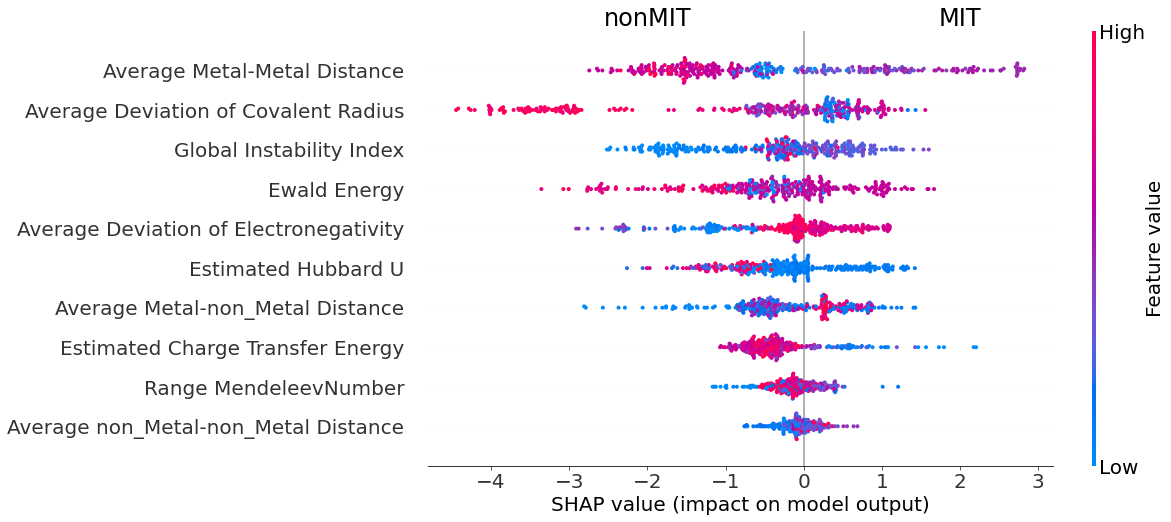

In [13]:
shap.summary_plot(shap_values, x, max_display=10, plot_type="dot", plot_size=(14, 8), show=False,
                  feature_names=["Global Instability Index", 
                                 "Estimated Hubbard U",
                                 "Estimated Charge Transfer Energy",
                                 "Ewald Energy", 
                                 "Average Deviation of Electronegativity",
                                 "Range MendeleevNumber", 
                                 "Average Deviation of Covalent Radius", 
                                 "Average Metal-Metal Distance", 
                                 "Average Metal-non_Metal Distance", 
                                 "Average non_Metal-non_Metal Distance"
                                 ])
ax = plt.gca()
fig = plt.gcf()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, 
              fig.axes[1].get_children()[8].get_children()[0],
              fig.axes[1].get_children()[8].get_children()[-2].get_children()[-1],
              fig.axes[1].get_children()[8].get_children()[-1].get_children()[-1]] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
ax.annotate("nonMIT", xy=(-2, 10), ha="center", va="bottom", fontsize=24)
ax.annotate("MIT", xy=(2, 10), ha="center", va="bottom", fontsize=24)
if SAVE_PLOT: ax.figure.savefig("../plots/mit_classifier_reduced_shap_dot.pdf", dpi=300, bbox_inches="tight")

In [14]:
NdNiO3 = df_reduced.loc[df_reduced.Compound == "NdNiO3"]
NdNiO3_index = NdNiO3.index.to_list()[0]
NdNiO3

,Compound,Label,struct_file_path,gii,est_hubbard_u,est_charge_trans,ewald_energy_per_atom,avg_dev_Electronegativity,range_MendeleevNumber,avg_dev_CovalentRadius,avg_mm_dists,avg_mx_dists,avg_xx_dists
312,NdNiO3,2,../data/Structures/MIT_materials/HighT/NdNiO3_...,0.342999,15.94851,10.55672,-33.822268,0.9192,68,46.32,3.804911,1.942537,2.853433


In [15]:
x.round(2).iloc[NdNiO3_index]

gii                           0.34
est_hubbard_u                15.95
est_charge_trans             10.56
ewald_energy_per_atom       -33.82
avg_dev_Electronegativity     0.92
range_MendeleevNumber        68.00
avg_dev_CovalentRadius       46.32
avg_mm_dists                  3.80
avg_mx_dists                  1.94
avg_xx_dists                  2.85
Name: 312, dtype: float64

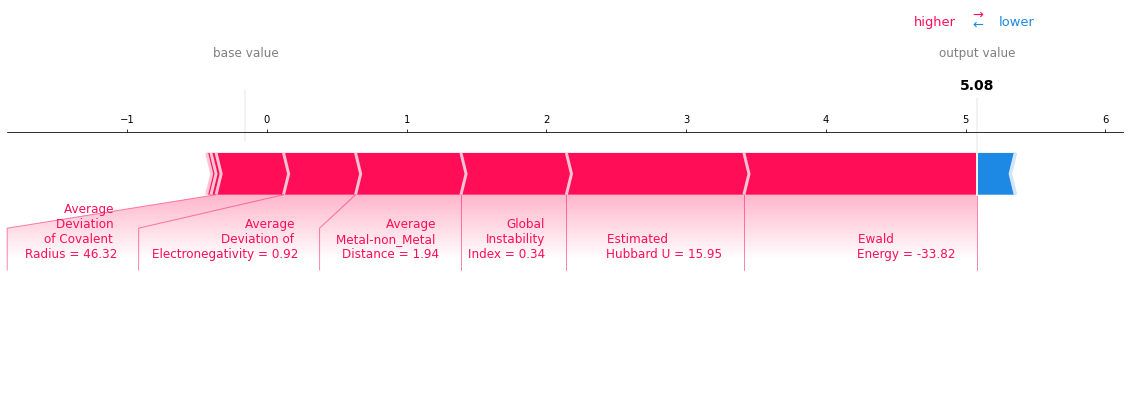

In [16]:
ind = NdNiO3_index
NdNiO3_shap = shap.force_plot(
    explainer.expected_value, 
    shap_values[ind], 
    x.round(2).iloc[ind], 
    matplotlib=True, 
    show=False,
    out_names="output value",
    figsize=(20, 5),
    feature_names=["Global\nInstability\nIndex", 
                   "Estimated              \nHubbard U",
                   "Estimated \nCharge \nTransfer Energy",
                   "Ewald                \nEnergy", 
                   "Average \nDeviation of \nElectronegativity",
                   "Range \nMendeleev\nNumber", 
                   "Average \nDeviation \nof Covalent \nRadius", 
                   "Average \nMetal-Metal \nDistance", 
                   "Average \nMetal-non_Metal \nDistance", 
                   "Average \nnon_Metal-\nnon_Metal \nDistance"
                  ]
    )

if SAVE_PLOT: NdNiO3_shap.savefig("../plots/NdNiO3_shap.pdf", dpi=300, bbox_inches="tight")

In [17]:
LuNiO3 = df_reduced.loc[df_reduced.Compound == "LuNiO3"]
LuNiO3_index = LuNiO3.index.to_list()[0]
LuNiO3

,Compound,Label,struct_file_path,gii,est_hubbard_u,est_charge_trans,ewald_energy_per_atom,avg_dev_Electronegativity,range_MendeleevNumber,avg_dev_CovalentRadius,avg_mm_dists,avg_mx_dists,avg_xx_dists
305,LuNiO3,2,../data/Structures/MIT_materials/HighT/LuNiO3_...,0.244159,15.86419,10.445842,-34.460828,0.888,46,42.96,3.721985,1.962367,2.811248


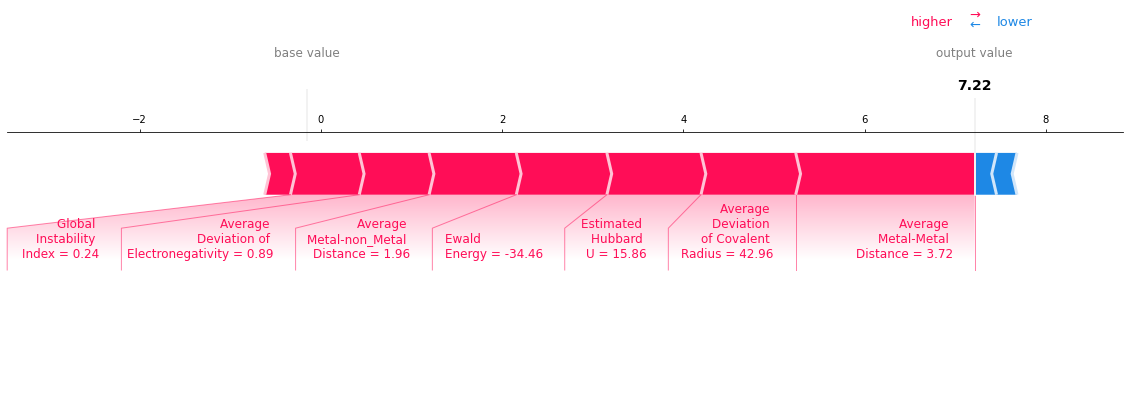

In [18]:
ind = LuNiO3_index
LuNiO3_shap = shap.force_plot(
    explainer.expected_value, 
    shap_values[ind], 
    x.round(2).iloc[ind], 
    matplotlib=True, 
    show=False,
    out_names="output value",
    figsize=(20, 5),
    feature_names=["Global \nInstability \nIndex", 
                   "Estimated \nHubbard \nU",
                   "Estimated \nCharge \nTransfer Energy",
                   "Ewald                \nEnergy", 
                   "Average \nDeviation of \nElectronegativity",
                   "Range \nMendeleev\nNumber", 
                   "Average \nDeviation \nof Covalent \nRadius", 
                   "Average \nMetal-Metal \nDistance", 
                   "Average \nMetal-non_Metal \nDistance", 
                   "Average \nnon_Metal-\nnon_Metal \nDistance"
                  ]
    )

if SAVE_PLOT: LuNiO3_shap.savefig("../plots/LuNiO3_shap.pdf", dpi=300, bbox_inches="tight")